# Feature Selection and Classification Using Decision Tree with Bayesian Optimization and Resampling Techniques

## Introduction
This notebook explores the use of a Decision Tree classifier combined with feature selection and Bayesian Optimization to improve classification tasks on imbalanced financial data. The model's performance is enhanced using advanced resampling techniques such as SMOTE and upsampling. The effectiveness of these techniques is evaluated through classification metrics and confusion matrices.

## Steps Overview

1. **Imports and Configuration**
   - Import necessary libraries for data manipulation, modeling, and evaluation.
   - Set a random seed for reproducibility.

2. **Data Loading and Preprocessing**
   - Load the bank portfolio data.
   - Standardize the feature columns to normalize the input data.
   - Rename the target column to 'Class' for clarity.

3. **Feature and Target Separation**
   - Separate the dataset into features (X) and the target variable (y) to prepare for model training.

4. **Initial Model Training with Feature Selection and Bayesian Optimization**
   - Define a pipeline combining feature selection and a Decision Tree classifier.
   - Set up Bayesian Optimization to fine-tune hyperparameters such as tree depth, split criteria, and minimum samples required for nodes.
   - Fit the model to the training data and evaluate its performance using a confusion matrix.

5. **Handling Imbalanced Classes: SMOTE Resampling**
   - Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
   - Retrain the Decision Tree classifier on the SMOTE-adjusted data.
   - Evaluate the model using classification metrics and confusion matrices.

---

## Detailed Sections

### 1. Imports and Configuration
We start by importing the required libraries for data processing, model building, and evaluation. Setting a random seed ensures that the results are consistent across different runs.

### 2. Data Loading and Preprocessing
The bank portfolio data is loaded, and the feature columns are standardized using `StandardScaler` to ensure uniform scale. The target column is renamed to 'Class' for better understanding and ease of reference.

### 3. Feature and Target Separation
The dataset is split into features (X) and the target variable (y). This separation prepares the data for training the Decision Tree classifier and for use in subsequent evaluation steps.

### 4. Initial Model Training with Feature Selection and Bayesian Optimization
A pipeline is defined that includes feature selection and a Decision Tree classifier. Bayesian Optimization is used to tune the hyperparameters of the classifier, such as maximum depth, splitting criteria, and minimum samples per node. The optimized model is then trained and evaluated on the test data using classification metrics and confusion matrices.

### 5. Handling Imbalanced Classes: SMOTE Resampling
SMOTE is employed to generate synthetic samples for the minority class, creating a balanced training set. The Decision Tree classifier is retrained on the SMOTE-adjusted data, and its performance is evaluated using accuracy, precision, recall, and F1 score metrics.

### 6. Handling Imbalanced Classes: Upsampling the Minority Class
The minority class is oversampled to match the size of the majority class, resulting in a balanced dataset. The classifier is retrained on the oversampled data, and its performance is assessed through classification metrics and confusion matrices.







### 1. Imports and Configuration

In [170]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample


np.random.seed(2)

### 2. Data Loading and Preprocessing

In [171]:
data = pd.read_csv('bankPortfolios.csv')


In [172]:
data.head()

,2699,6107,9965,1036,2924,3786,4573,1087,617,76.827,769,1828.2,381,933,32673,1
0,759920.0,6480.0,588660.0,528110.0,1188700.0,169400.0,174890.0,10210.0,6566.0,21101.00,211210.0,428740.0,82487.0,68882.0,3770300.0,1
1,129080.0,729.0,72972.0,3310.0,73909.0,34.0,44928.0,32995.0,409.0,502.00,15599.0,57902.0,20800.0,12168.0,423250.0,1
2,57828.0,1449.8,27634.0,1739.0,39274.0,1838.3,9854.0,1900.0,321.0,228.98,2291.9,7696.0,4609.0,7823.0,145830.0,1
3,1021.0,14222.0,3186.0,35.0,4776.0,29645.0,9295.0,3245.0,493.0,215.00,4932.0,20818.0,891.0,3661.0,87600.0,1
4,149560.0,93281.0,211800.0,7950.0,151300.0,16933.0,32142.0,2020.0,880.0,3106.00,17057.0,137950.0,12992.0,22517.0,792090.0,1


In [174]:
# normalizing the data for all the columns except for the last one
sc = StandardScaler()
data.iloc[:, :-1] = sc.fit_transform(data.iloc[:, :-1])

# change the last column name 1 to 'Class'
data.rename(columns={'1': 'Class'}, inplace=True)
data.head()


,2699,6107,9965,1036,2924,3786,4573,1087,617,76.827,769,1828.2,381,933,32673,Class
0,0.626612,-0.039225,0.021046,1.363177,0.581567,0.278336,-0.007969,-0.037124,-0.023536,0.033683,0.048713,0.024422,0.203004,0.003597,0.087925,1
1,0.028024,-0.048131,-0.034434,-0.055347,-0.047822,-0.057001,-0.040954,-0.031949,-0.028403,-0.048722,-0.036377,-0.038803,0.006786,-0.036993,-0.039332,1
2,-0.039585,-0.047015,-0.039312,-0.059593,-0.067376,-0.053429,-0.049856,-0.039011,-0.028472,-0.049814,-0.042165,-0.047362,-0.044715,-0.040103,-0.049880,1
3,-0.093488,-0.027235,-0.041942,-0.064199,-0.086853,0.001627,-0.049998,-0.038706,-0.028336,-0.049870,-0.041017,-0.045125,-0.056542,-0.043081,-0.052094,1
4,0.047457,0.095199,-0.019499,-0.042805,-0.004129,-0.023542,-0.044200,-0.038984,-0.028030,-0.038304,-0.035743,-0.025155,-0.018050,-0.029586,-0.025309,1


### 3. Feature and Target Separation

In [175]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [176]:
y.head()


,Class
0,1
1,1
2,1
3,1
4,1


In [177]:
X.head()

,2699,6107,9965,1036,2924,3786,4573,1087,617,76.827,769,1828.2,381,933,32673
0,0.626612,-0.039225,0.021046,1.363177,0.581567,0.278336,-0.007969,-0.037124,-0.023536,0.033683,0.048713,0.024422,0.203004,0.003597,0.087925
1,0.028024,-0.048131,-0.034434,-0.055347,-0.047822,-0.057001,-0.040954,-0.031949,-0.028403,-0.048722,-0.036377,-0.038803,0.006786,-0.036993,-0.039332
2,-0.039585,-0.047015,-0.039312,-0.059593,-0.067376,-0.053429,-0.049856,-0.039011,-0.028472,-0.049814,-0.042165,-0.047362,-0.044715,-0.040103,-0.049880
3,-0.093488,-0.027235,-0.041942,-0.064199,-0.086853,0.001627,-0.049998,-0.038706,-0.028336,-0.049870,-0.041017,-0.045125,-0.056542,-0.043081,-0.052094
4,0.047457,0.095199,-0.019499,-0.042805,-0.004129,-0.023542,-0.044200,-0.038984,-0.028030,-0.038304,-0.035743,-0.025155,-0.018050,-0.029586,-0.025309


### 4. Initial Model Training with Feature Selection and Bayesian Optimization

In [178]:
# split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [179]:
X_train.shape


(5447, 15)

In [180]:
X_test.shape


(2335, 15)

DECISION TREES

In [185]:
# Define a search space for hyperparameters
search_space = {
    'model__max_depth': Integer(2, 16),
    'model__min_samples_split': Integer(2, 50),
    'model__min_samples_leaf': Integer(1, 50),
    'model__criterion': Categorical(['gini', 'entropy']),
}

# Initialize the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Create a pipeline that selects features based on importance and then fits a model
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(DecisionTreeClassifier(random_state=0))),
    ('model', decision_tree)
])

# Set up Bayesian optimization
bayes_search = BayesSearchCV(
    pipeline,
    search_space,
    n_iter=30,  # Number of iterations
    n_jobs=-1,
    cv=5  # 5-fold cross-validation
)

# Fit the model with the optimizer
bayes_search.fit(X_train, y_train.values.ravel())


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('feature_selection',
                                         SelectFromModel(estimator=DecisionTreeClassifier(random_state=0))),
                                        ('model',
                                         DecisionTreeClassifier(random_state=0))]),
              n_iter=30, n_jobs=-1,
              search_spaces={'model__criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'model__max_depth': Integer(low=2, high=16, prior='uniform', transform='normalize'),
                             'model__min_samples_leaf': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'model__min_samples_split': Integer(low=2, high=50, prior='uniform', transform='normalize')})

In [188]:
# Get the best model
best_model = bayes_search.best_estimator_


# Get the feature selection step
selected_features = best_model.named_steps['feature_selection'].get_support()

# Get feature names (assuming X is a DataFrame for this example)
selected_feature_names = X_train.columns[selected_features]

# Predictions
y_pred = best_model.predict(X_test)

# Scoring
score = best_model.score(X_test, y_test)

print(f'Best Parameters: {bayes_search.best_params_}')
print(f'Test Score: {score}')
print(f'Selected Features: {selected_feature_names}')

Best Parameters: OrderedDict([('model__criterion', 'entropy'), ('model__max_depth', 7), ('model__min_samples_leaf', 39), ('model__min_samples_split', 29)])
Test Score: 0.95203426124197


In [189]:
# Confusion matrix plotting function
def plot_confusion_matrix(cm, classes,
                          normalize=True, # True for normalization and False for normalization
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Define the threshold for changing the text color in the blocks
    thresh = cm.max() / 2.

    # Annotate the blocks
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:.2f}\n(TP)" if i == j and i == 1 else
                 f"{cm[i, j]:.2f}\n(TN)" if i == j and i == 0 else
                 f"{cm[i, j]:.2f}\n(FP)" if j == 1 else
                 f"{cm[i, j]:.2f}\n(FN)",
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [190]:
y_pred = best_model.predict(X_test)
y_expected = pd.DataFrame(y_test)

Confusion Matrix 
[[2216   10]
 [ 102    7]]
Normalized confusion matrix
[[0.99550764 0.00449236]
 [0.93577982 0.06422018]]


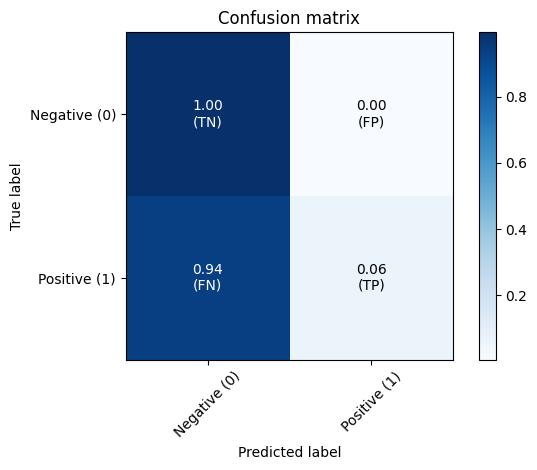

In [191]:
# Calculate the confusion matrix
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])
plt.show()

### 5. Handling Imbalanced Classes: SMOTE Resampling### 5. Handling Imbalanced Classes: SMOTE Resampling

In [192]:
sm = SMOTE(random_state=123)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_train_smote,y_train_smote,test_size=0.3)

In [196]:
# Define a search space for hyperparameters
search_space = {
    'model__max_depth': Integer(2, 16),
    'model__min_samples_split': Integer(2, 50),
    'model__min_samples_leaf': Integer(1, 50),
    'model__criterion': Categorical(['gini', 'entropy']),
}


# Set up Bayesian optimization
bayes_search = BayesSearchCV(
    pipeline,
    search_space,
    n_iter=30,  # Number of iterations
    n_jobs=-1,
    cv=5  # 5-fold cross-validation
)

# Fit the model with the optimizer
bayes_search.fit(X_train, y_train.values.ravel())


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('feature_selection',
                                         SelectFromModel(estimator=DecisionTreeClassifier(random_state=0))),
                                        ('model',
                                         DecisionTreeClassifier(random_state=0))]),
              n_iter=30, n_jobs=-1,
              search_spaces={'model__criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'model__max_depth': Integer(low=2, high=16, prior='uniform', transform='normalize'),
                             'model__min_samples_leaf': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'model__min_samples_split': Integer(low=2, high=50, prior='uniform', transform='normalize')})

In [199]:
# Get the best model
best_model = bayes_search.best_estimator_

# Get the feature selection step
selected_features = best_model.named_steps['feature_selection'].get_support()

# Get feature names (assuming X is a DataFrame for this example)
selected_feature_names = X_train.columns[selected_features]

# Predictions
y_pred = best_model.predict(X_test)

# Scoring
score = best_model.score(X_test, y_test)

print(f'Best Parameters: {bayes_search.best_params_}')
print(f'Test Score: {score}')
print(f'Selected Features: {selected_feature_names}')


Best Parameters: OrderedDict([('model__criterion', 'entropy'), ('model__max_depth', 16), ('model__min_samples_leaf', 1), ('model__min_samples_split', 3)])
Test Score: 0.8397334179625515
Selected Features: Index(['2699', '76.827'], dtype='object')


Confusion Matrix 
[[6657  820]
 [  56  249]]
Normalized confusion matrix
[[0.89033035 0.10966965]
 [0.18360656 0.81639344]]


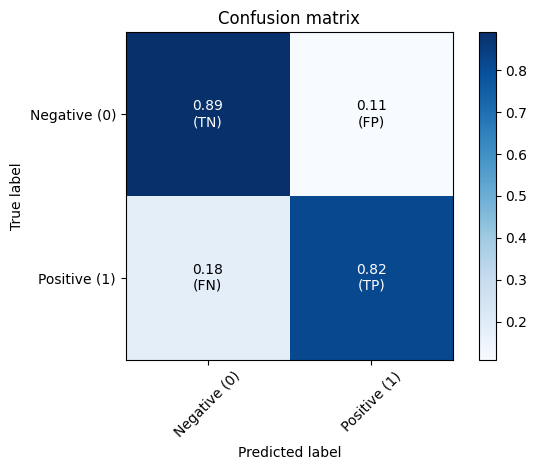

In [202]:
y_pred = best_model.predict(X)
y_expected = pd.DataFrame(y)

# Calculate the confusion matrix
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])
plt.show()

### 6. Handling Imbalanced Classes: Upsampling the Minority 




In [203]:

# Assuming X_train and y_train are your features and labels
X = pd.concat([X_train, y_train], axis=1)
minority_class = X[X.Class==1]  
majority_class = X[X.Class==0]  

minority_class_upsampled = resample(minority_class,
                                    replace=True,  # sample with replacement
                                    n_samples=len(majority_class),  # match number in majority class
                                    random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_class_upsampled])

# Splitting into features and labels after resampling
X_train = upsampled.drop('Class', axis=1)  # Replace 'target' with your actual class column name
y_train = upsampled['Class']  # Replace 'target' with your actual class column name

In [206]:
# Define a search space for hyperparameters
search_space = {
    'model__max_depth': Integer(2, 16),
    'model__min_samples_split': Integer(2, 50),
    'model__min_samples_leaf': Integer(1, 50),
    'model__criterion': Categorical(['gini', 'entropy']),
}


# Set up Bayesian optimization
bayes_search = BayesSearchCV(
    pipeline,
    search_space,
    n_iter=30,  # Number of iterations
    n_jobs=-1,
    cv=5  # 5-fold cross-validation
)

In [207]:
# Fit the model with the optimizer
bayes_search.fit(X_train, y_train.values.ravel())


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('feature_selection',
                                         SelectFromModel(estimator=DecisionTreeClassifier(random_state=0))),
                                        ('model',
                                         DecisionTreeClassifier(random_state=0))]),
              n_iter=30, n_jobs=-1,
              search_spaces={'model__criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'model__max_depth': Integer(low=2, high=16, prior='uniform', transform='normalize'),
                             'model__min_samples_leaf': Integer(low=1, high=50, prior='uniform', transform='normalize'),
                             'model__min_samples_split': Integer(low=2, high=50, prior='uniform', transform='normalize')})

In [209]:
# Get the best model
best_model = bayes_search.best_estimator_


# Get the feature selection step
selected_features = best_model.named_steps['feature_selection'].get_support()

# Get feature names (assuming X is a DataFrame for this example)
selected_feature_names = X_train.columns[selected_features]

# Predictions
y_pred = best_model.predict(X_test)

In [211]:
# Scoring
score = best_model.score(X_test, y_test)

print(f'Best Parameters: {bayes_search.best_params_}')
print(f'Test Score: {score}')
print(f'Selected Features: {selected_feature_names}')

Best Parameters: OrderedDict([('model__criterion', 'entropy'), ('model__max_depth', 16), ('model__min_samples_leaf', 1), ('model__min_samples_split', 2)])
Test Score: 0.7940336401142495
Selected Features: Index(['2699', '76.827'], dtype='object')


Confusion Matrix 
[[1262  307]
 [ 342 1240]]
Normalized confusion matrix
[[0.80433397 0.19566603]
 [0.21618205 0.78381795]]


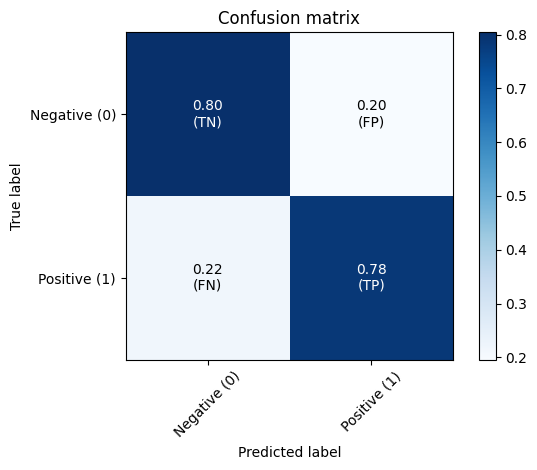

In [214]:
y_pred = best_model.predict(X_test)
y_expected = pd.DataFrame(y_test)

# Calculate the confusion matrix
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
print(f'Confusion Matrix \n{cnf_matrix}')
plot_confusion_matrix(cnf_matrix, classes=['Negative (0)', 'Positive (1)'])
plt.show()